<a href="https://colab.research.google.com/github/littleShaniZ/ControlNet/blob/SelectiveControlNet/BasicInfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torchvision
print("NumPy:", np.__version__)
print("Torch:", torch.__version__)
print("TorchVision:", torchvision.__version__)
print("CUDA available:", torch.cuda.is_available())

NumPy: 2.2.4
Torch: 2.6.0+cu124
TorchVision: 0.21.0+cu124
CUDA available: True


In [2]:
!pip install basicsr omegaconf einops
!pip install diffusers transformers xformers
!pip install open_clip_torch
!pip install pytorch-lightning==1.9.4

In [1]:
!git clone https://github.com/lllyasviel/ControlNet-v1-1-nightly.git
%cd ControlNet-v1-1-nightly

Cloning into 'ControlNet-v1-1-nightly'...
remote: Enumerating objects: 2416, done.
remote: Counting objects: 100% (465/465), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 2416 (delta 375), reused 339 (delta 339), pack-reused 1951 (from 1)
Receiving objects: 100% (2416/2416), 65.14 MiB | 16.60 MiB/s, done.
Resolving deltas: 100% (1014/1014), done.
Updating files: 100% (1014/1014), done.
/content/ControlNet-v1-1-nightly


In [4]:
!mkdir -p models
!wget -O models/control_v11p_sd15_lineart.pth https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_lineart.pth

--2025-03-30 12:13:55--  https://huggingface.co/lllyasviel/ControlNet-v1-1/resolve/main/control_v11p_sd15_lineart.pth
Resolving huggingface.co (huggingface.co)... 54.230.71.2, 54.230.71.103, 54.230.71.28, ...
Connecting to huggingface.co (huggingface.co)|54.230.71.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/e7/4c/e74c9ddc88b5a293fa8aafeb615d6c61cb3aaa34dc7ce9e25100dfae2b09bf55/fb5fb912696830da948e5056b50adfa3fcc68ff760c43e4e7a8499853af43c61?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27control_v11p_sd15_lineart.pth%3B+filename%3D%22control_v11p_sd15_lineart.pth%22%3B&Expires=1743340005&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0MzM0MDAwNX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy9lNy80Yy9lNzRjOWRkYzg4YjVhMjkzZmE4YWFmZWI2MTVkNmM2MWNiM2FhYTM0ZGM3Y2U5ZTI1MTAwZGZhZTJiMDliZjU1L2ZiNWZiOTEyNjk2ODMwZGE5NDhlNTA1NmI1MGFkZmEzZmNjNjhmZjc2MGM0M2U0ZTdhODQ5OTg

In [5]:
import torch
import torchvision
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler
from annotator.lineart import LineartDetector
from annotator.canny import CannyDetector

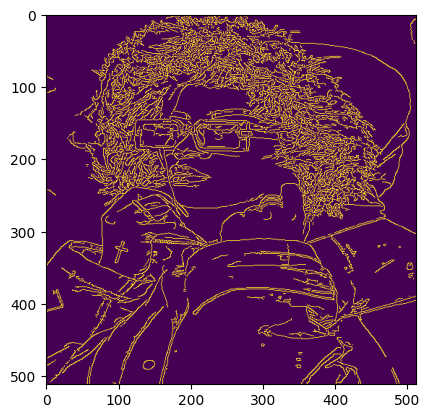

In [6]:
image_path = "test_imgs/person_2.jpeg"
input_image = Image.open(image_path).convert("RGB").resize((512, 512))
input_np = np.array(input_image)
detector = CannyDetector()
hint_np = detector(input_np, low_threshold=100, high_threshold=200)
plt.imshow(hint_np)

In [12]:
model = create_model(f'./models/control_v11p_sd15_lineart.yaml').cpu()
model.load_state_dict(load_state_dict(f'./models/control_v11p_sd15_lineart.pth', location='cuda'), strict=False)
model = model.cuda()
model.eval()
sampler = DDIMSampler(model)

ImportError: cannot import name '_distributed_available' from 'lightning_fabric.utilities.distributed' (/usr/local/lib/python3.11/dist-packages/lightning_fabric/utilities/distributed.py)